In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
bank_df_filtered = pd.read_csv('test_data.csv')

In [27]:
from sklearn.model_selection import train_test_split
X = bank_df_filtered[['age', 'job', 'marital', 'education','balance', 'housing',  'contact', 'day', 'duration','campaign', 'pdays', 'previous', 'y']]
y = bank_df_filtered['y']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')


In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#logmodel.fit(X,y)
predictions_test = logmodel.predict(X_test)

#print(predictions)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predictions for yes :  138
Predictions for no :  1342


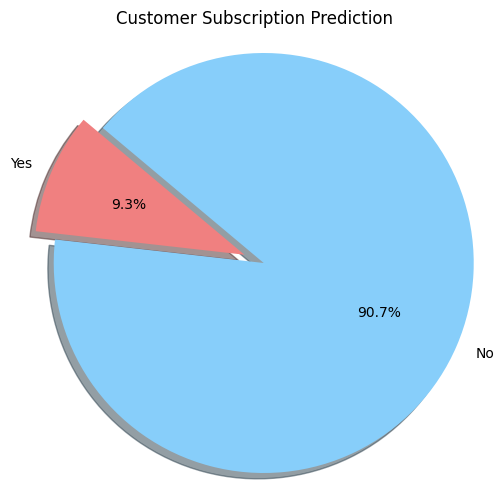

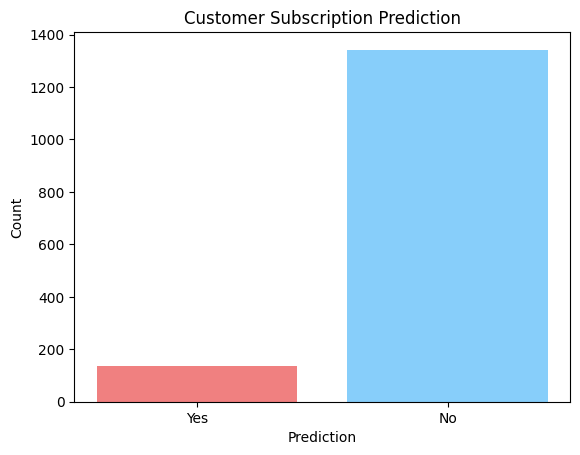

In [29]:
num_yes = sum(predictions_test)  # Counting the number of 'yes' predictions
num_no = len(predictions_test) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions_test)  # Counting the number of 'yes' predictions
num_no = len(predictions_test) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1308
           1       0.81      0.65      0.72       172

    accuracy                           0.94      1480
   macro avg       0.88      0.82      0.85      1480
weighted avg       0.94      0.94      0.94      1480



In [31]:
final_dataset = pd.read_csv('oversampled_train.csv')
final_dataset.columns
X = final_dataset[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'duration','campaign', 'pdays', 'previous', 'y']]
y = final_dataset['y']
predictions_lr = logmodel.predict(X)

Predictions for yes :  32154
Predictions for no :  47182


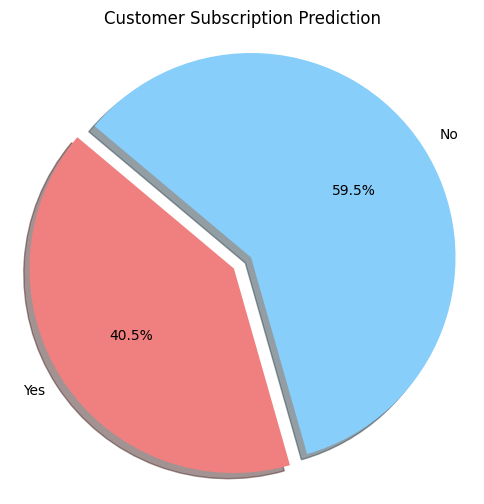

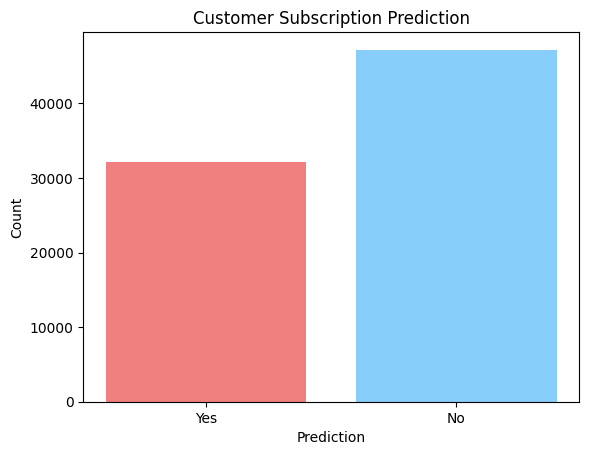

In [32]:
num_yes = sum(predictions_lr)  # Counting the number of 'yes' predictions
num_no = len(predictions_lr) - num_yes  # Counting the number of 'no' predictions
print('Predictions for yes : ',num_yes)
print('Predictions for no : ',num_no)

labels = ['Yes', 'No']
sizes = [num_yes, num_no]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Yes' slice

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer Subscription Prediction")
plt.show()
# Using Bar Chart:

# python
# Copy code
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in the variable 'predictions'
num_yes = sum(predictions_lr)  # Counting the number of 'yes' predictions
num_no = len(predictions_lr) - num_yes  # Counting the number of 'no' predictions

# Data for the bar chart
labels = ['Yes', 'No']
counts = [num_yes, num_no]

# Creating the bar chart
plt.bar(labels, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Customer Subscription Prediction')
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y,predictions_lr))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     39668
           1       0.98      0.80      0.88     39668

    accuracy                           0.89     79336
   macro avg       0.91      0.89      0.89     79336
weighted avg       0.91      0.89      0.89     79336



In [36]:
import pickle
# Saving model to disk
pickle.dump(logmodel, open('logistic_model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(predictions_lr)

[0 0 0 ... 0 1 1]
